1. Объединить 2 таблицы по всем картам и картам Почта-Банка
2. Расcчитать fb_rate = unique_fb_cards / cnt_trn
3. Построить диаграмму распределения количества АТМ по fb_rate
4. Рассчитать fb_percent = fallback / cnt_trn

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(18,7)})

In [2]:
fb = pd.read_csv('/home/DVL/mokhovdg/environments/transactions_forecast/src/Fb.csv', sep=';')
fb_pb_only = pd.read_csv('/home/DVL/mokhovdg/environments/transactions_forecast/src/Fb_only_pb_cards.csv', sep=';')

In [3]:
fb_pb_plus_all = fb.merge(fb_pb_only, how='outer', on=['atm_id', 'operation_date'], suffixes=('_all', '_pb'))

In [4]:
display(fb.head(5))
display(fb_pb_only.head(5))
display(fb_pb_plus_all.head(5))

,atm_id,operation_date,fallback,unique_fb_cards,cnt_trn,magnetic_stripe
0,220K5199,2019-08-01,0,0,1,0
1,220K5505,2019-08-01,0,0,1,0
2,220K8685,2019-08-01,0,0,1,0
3,220K8766,2019-08-01,0,0,3,0
4,220K6511,2019-08-01,0,0,6,0


,atm_id,operation_date,fallback,unique_fb_cards,cnt_trn,magnetic_stripe
0,220K5199,2019-08-01,0,0,1,0
1,220K5505,2019-08-01,0,0,1,0
2,220K6896,2019-08-01,0,0,2,0
3,220K5151,2019-08-01,0,0,2,0
4,220K7911,2019-08-01,0,0,1,0


,atm_id,operation_date,fallback_all,unique_fb_cards_all,cnt_trn_all,magnetic_stripe_all,fallback_pb,unique_fb_cards_pb,cnt_trn_pb,magnetic_stripe_pb
0,220K5199,2019-08-01,0,0,1,0,0.0,0.0,1.0,0.0
1,220K5505,2019-08-01,0,0,1,0,0.0,0.0,1.0,0.0
2,220K8685,2019-08-01,0,0,1,0,0.0,0.0,1.0,0.0
3,220K8766,2019-08-01,0,0,3,0,0.0,0.0,1.0,0.0
4,220K6511,2019-08-01,0,0,6,0,NaN,NaN,NaN,NaN


In [5]:
fb_pb_plus_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195595 entries, 0 to 3195594
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   atm_id               object 
 1   operation_date       object 
 2   fallback_all         int64  
 3   unique_fb_cards_all  int64  
 4   cnt_trn_all          int64  
 5   magnetic_stripe_all  int64  
 6   fallback_pb          float64
 7   unique_fb_cards_pb   float64
 8   cnt_trn_pb           float64
 9   magnetic_stripe_pb   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 268.2+ MB


In [6]:
fb_pb_plus_all = fb_pb_plus_all.fillna(0)

fb_pb_plus_all['fallback_pb'] = fb_pb_plus_all['fallback_pb'].astype(int)
fb_pb_plus_all['unique_fb_cards_pb'] = fb_pb_plus_all['unique_fb_cards_pb'].astype(int)
fb_pb_plus_all['cnt_trn_pb'] = fb_pb_plus_all['cnt_trn_pb'].astype(int)
fb_pb_plus_all['magnetic_stripe_pb'] = fb_pb_plus_all['magnetic_stripe_pb'].astype(int)

#fb_rate = unique_fb_cards / cnt_trn
fb_pb_plus_all['fb_rate_pb'] = fb_pb_plus_all['unique_fb_cards_pb']/fb_pb_plus_all['cnt_trn_pb']
fb_pb_plus_all['fb_rate_all'] = fb_pb_plus_all['unique_fb_cards_all']/fb_pb_plus_all['cnt_trn_all']
fb_pb_plus_all['fb_rate_pb_round'] = round(fb_pb_plus_all['fb_rate_pb'], 3)
fb_pb_plus_all['fb_rate_all_round'] = round(fb_pb_plus_all['fb_rate_all'], 3)

#fb_percent = fallback / cnt_trn
fb_pb_plus_all['fb_percent_pb'] = fb_pb_plus_all['fallback_pb']/fb_pb_plus_all['cnt_trn_pb']
fb_pb_plus_all['fb_percent_all'] = fb_pb_plus_all['fallback_all']/fb_pb_plus_all['cnt_trn_all']

#pb_cards_share = unique_fb_cards_pb/unique_fb_cards_all
fb_pb_plus_all['pb_cards_share'] = fb_pb_plus_all['unique_fb_cards_pb']/fb_pb_plus_all['unique_fb_cards_all']

fb_pb_plus_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195595 entries, 0 to 3195594
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   atm_id               object 
 1   operation_date       object 
 2   fallback_all         int64  
 3   unique_fb_cards_all  int64  
 4   cnt_trn_all          int64  
 5   magnetic_stripe_all  int64  
 6   fallback_pb          int64  
 7   unique_fb_cards_pb   int64  
 8   cnt_trn_pb           int64  
 9   magnetic_stripe_pb   int64  
 10  fb_rate_pb           float64
 11  fb_rate_all          float64
 12  fb_rate_pb_round     float64
 13  fb_rate_all_round    float64
 14  fb_percent_pb        float64
 15  fb_percent_all       float64
 16  pb_cards_share       float64
dtypes: float64(7), int64(8), object(2)
memory usage: 438.8+ MB


7. Оценить информативность признака magnetic_stripe (дает ли он дополнительную информацию к остальным признакам).

    Новой информации признак magnetic_stripe не дает, практически во всей выборке fallback == magnetic_stripe, так как фоллбэк транзакция - это транзакция, прошедшая с использованием магнитной полосы. В каждой выборке только у 220K8414 есть операции фоллбэк без магнитной полосы, это с большой долей вероятности ошибка в проставления признака pos_entry_mode на хосте(если актуально, то можно будет уточнить у коллег на хосте ПХ1). Поэтому признак magnetic_stripe можно исключить из анализа.

In [7]:
fb_pb_plus_all = fb_pb_plus_all.drop(['magnetic_stripe_pb', 'magnetic_stripe_all'], axis=1)

fb_pb_plus_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195595 entries, 0 to 3195594
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   atm_id               object 
 1   operation_date       object 
 2   fallback_all         int64  
 3   unique_fb_cards_all  int64  
 4   cnt_trn_all          int64  
 5   fallback_pb          int64  
 6   unique_fb_cards_pb   int64  
 7   cnt_trn_pb           int64  
 8   fb_rate_pb           float64
 9   fb_rate_all          float64
 10  fb_rate_pb_round     float64
 11  fb_rate_all_round    float64
 12  fb_percent_pb        float64
 13  fb_percent_all       float64
 14  pb_cards_share       float64
dtypes: float64(7), int64(6), object(2)
memory usage: 390.1+ MB


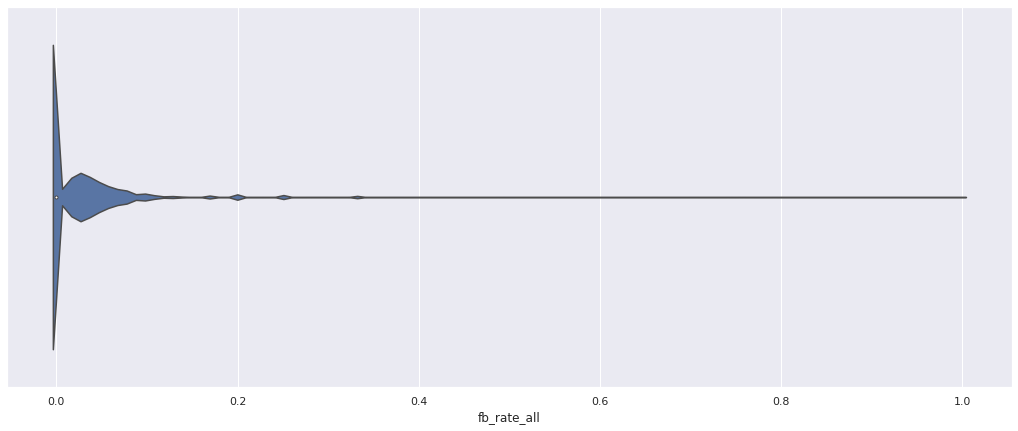

In [8]:
sns.violinplot(x=fb_pb_plus_all['fb_rate_all']);

In [9]:
fb_rate_atm = fb_pb_plus_all.groupby('fb_rate_all_round').count()['atm_id'] 
fb_rate_atm = pd.DataFrame(fb_rate_atm).reset_index()

display(fb_rate_atm.sort_values(by=['atm_id'], ascending=False).head(20))
display(fb_rate_atm[fb_rate_atm['fb_rate_all_round'] != 0].sort_values(by=['atm_id'], ascending=False).head(20))

,fb_rate_all_round,atm_id
0,0.000,2579680
27,0.029,18075
24,0.026,15152
41,0.043,14879
60,0.062,14741
51,0.053,14610
57,0.059,14596
54,0.056,14521
65,0.067,14505
48,0.050,14479


,fb_rate_all_round,atm_id
27,0.029,18075
24,0.026,15152
41,0.043,14879
60,0.062,14741
51,0.053,14610
57,0.059,14596
54,0.056,14521
65,0.067,14505
48,0.050,14479
69,0.071,14281


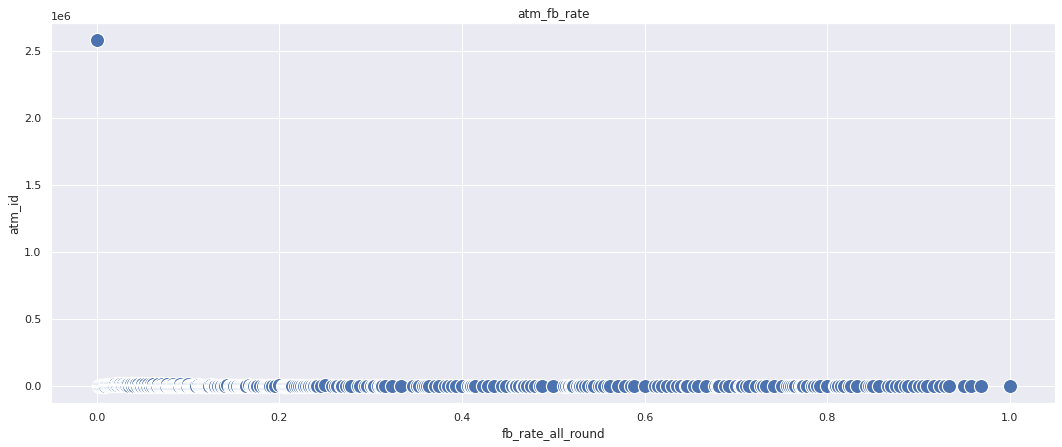

In [10]:
sns.scatterplot(data = fb_rate_atm ,y ='atm_id', x='fb_rate_all_round', s = 200)
plt.title('atm_fb_rate')
plt.show()

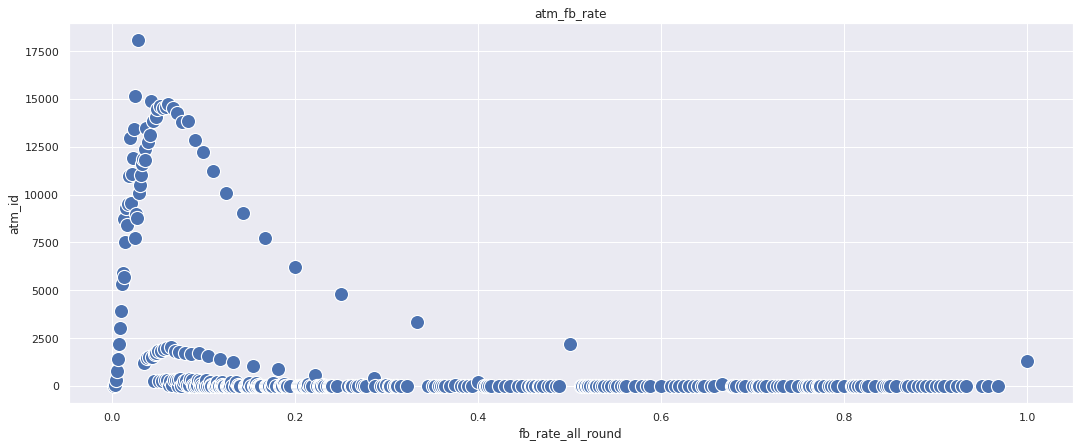

In [11]:
sns.scatterplot(data = fb_rate_atm[fb_rate_atm['fb_rate_all_round'] != 0] ,y ='atm_id', x='fb_rate_all_round', s = 200)
plt.title('atm_fb_rate')
plt.show()

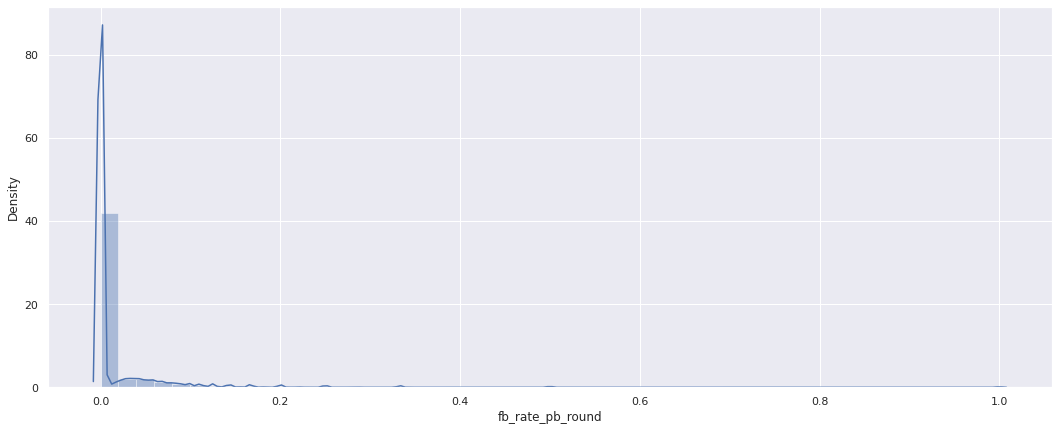

In [12]:
sns.distplot(fb_pb_plus_all['fb_rate_pb_round']);

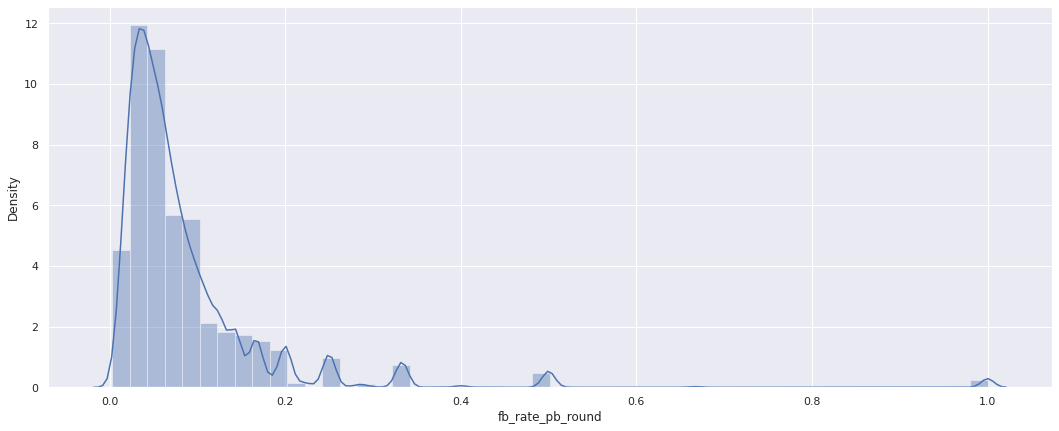

In [13]:
sns.distplot(fb_pb_plus_all[fb_pb_plus_all['fb_rate_pb_round'] != 0.000]['fb_rate_pb_round']);

5. Построить график – fb_rate по времени для нескольких ATM

In [14]:
atm_list = ['220K8178', '220K5477', '220K5510', '220K9122', '220K6585', '220K7997', '220K8901']

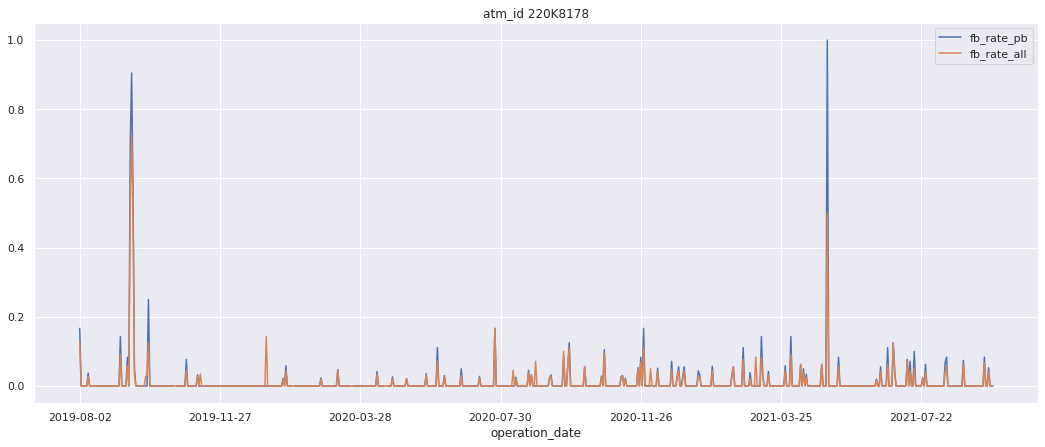

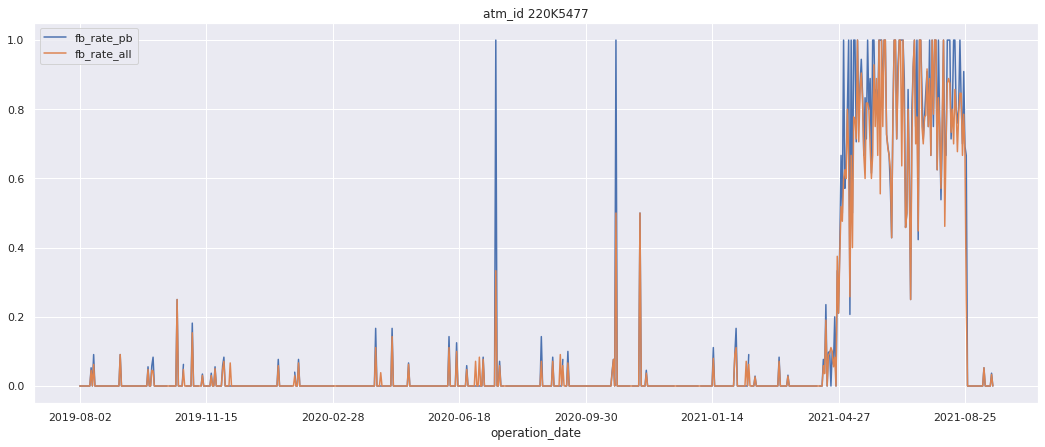

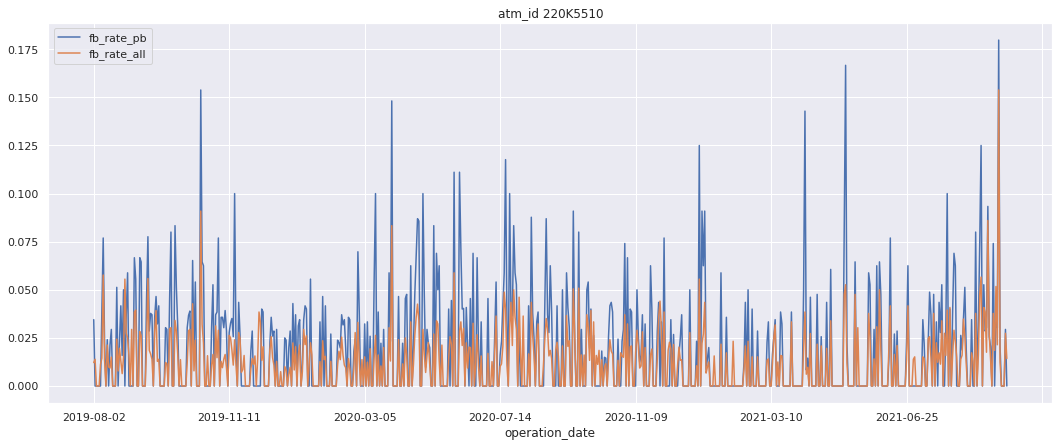

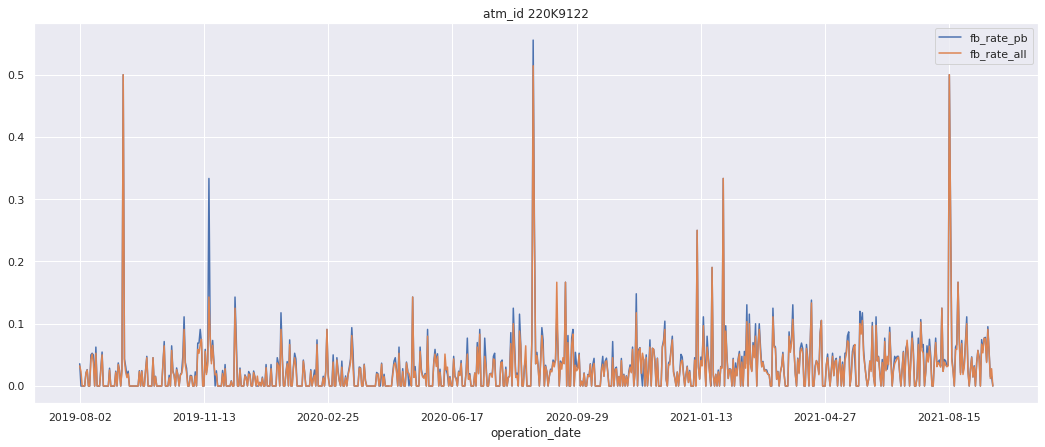

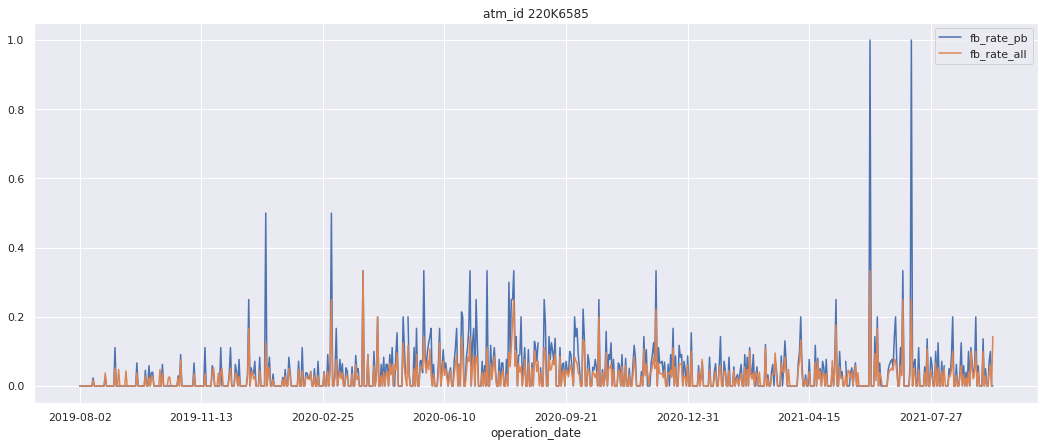

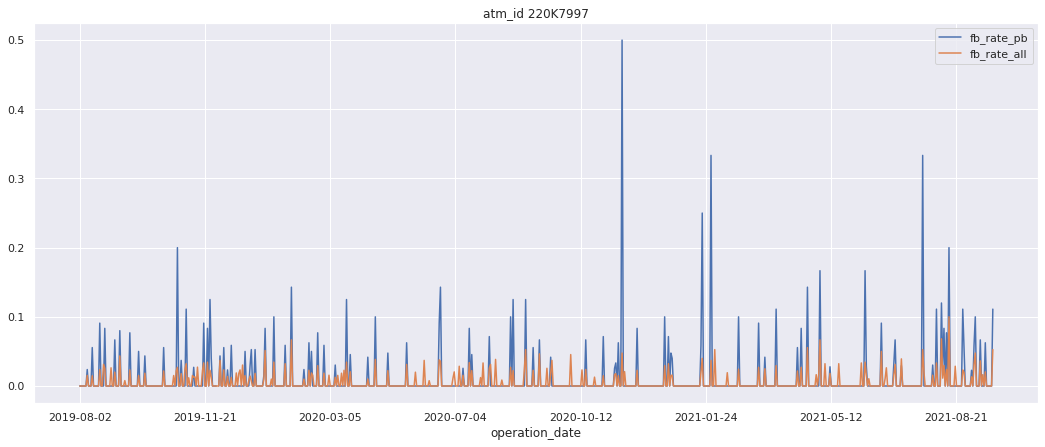

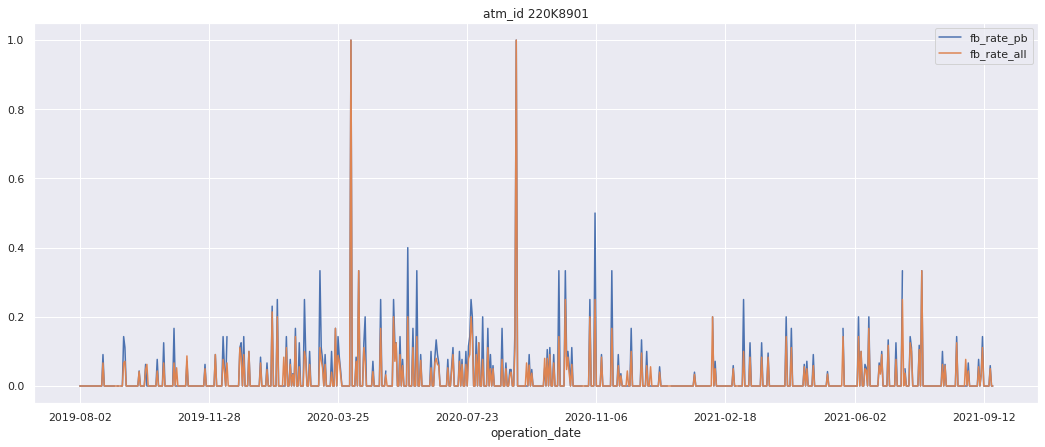

In [15]:
for atm in atm_list:
    fb_atm = fb_pb_plus_all[fb_pb_plus_all['atm_id'] == atm][['operation_date', 'fb_rate_pb', 'fb_rate_all']].set_index('operation_date')
    #display(atm)
    #display(fb_atm)
    fb_atm.plot();
    plt.title('atm_id ' + atm)

Постепенного роста по операциям fallback на длительном этапе не наблюдается, также нет сезонности, поэтомы для анализа можно использовать меньшую глубину данных (например, квартал или полгода). 

Графики fb_rate_pb и fb_rate_all практически совпадают, хотя и есть некоторые различия, внизу вывел данные где доля fallback транзакций ПБ меньше половины, а количество fallback более 20. Но это возможно и из-за неработающего чипа на карте чужого банка(лучше уточнить у технологов), если это так, то может быть сформирована излишняя заявка на проверку оборудования.

In [16]:
display(fb_pb_plus_all[(fb_pb_plus_all['pb_cards_share'] < 0.5) & (fb_pb_plus_all['fallback_all'] > 20)].head(10))

,atm_id,operation_date,fallback_all,unique_fb_cards_all,cnt_trn_all,fallback_pb,unique_fb_cards_pb,cnt_trn_pb,fb_rate_pb,fb_rate_all,fb_rate_pb_round,fb_rate_all_round,fb_percent_pb,fb_percent_all,pb_cards_share
178353,220K8178,2019-09-13,79,41,79,29,20,29,0.689655,0.518987,0.690,0.519,1.000000,1.000000,0.487805
310242,220K8566,2019-10-14,25,10,57,2,2,20,0.100000,0.175439,0.100,0.175,0.100000,0.438596,0.200000
319723,220K8566,2019-10-16,32,22,40,11,9,16,0.562500,0.550000,0.562,0.550,0.687500,0.800000,0.409091
324464,220K8566,2019-10-17,43,16,54,5,5,14,0.357143,0.296296,0.357,0.296,0.357143,0.796296,0.312500
487337,220K7883,2019-11-25,22,17,22,6,6,6,1.000000,0.772727,1.000,0.773,1.000000,1.000000,0.352941
513102,220K8818,2019-12-02,40,24,59,12,11,24,0.458333,0.406780,0.458,0.407,0.500000,0.677966,0.458333
1409026,220D2036,2020-07-15,33,21,33,6,6,6,1.000000,0.636364,1.000,0.636,1.000000,1.000000,0.285714
1549472,220K7609,2020-08-17,22,15,22,9,7,9,0.777778,0.681818,0.778,0.682,1.000000,1.000000,0.466667
1698206,220K5471,2020-09-21,45,28,53,13,13,19,0.684211,0.528302,0.684,0.528,0.684211,0.849057,0.464286
2286593,220K8064,2021-02-09,23,1,41,0,0,6,0.000000,0.024390,0.000,0.024,0.000000,0.560976,0.000000


6. Построить график fb_rate по времени по нескольким АТМ с суммированием скользящим окном (3D, 7D)

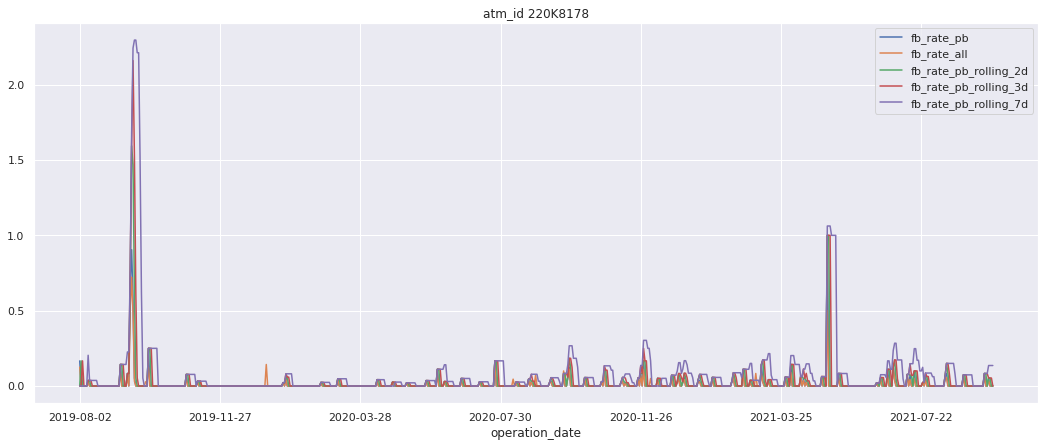

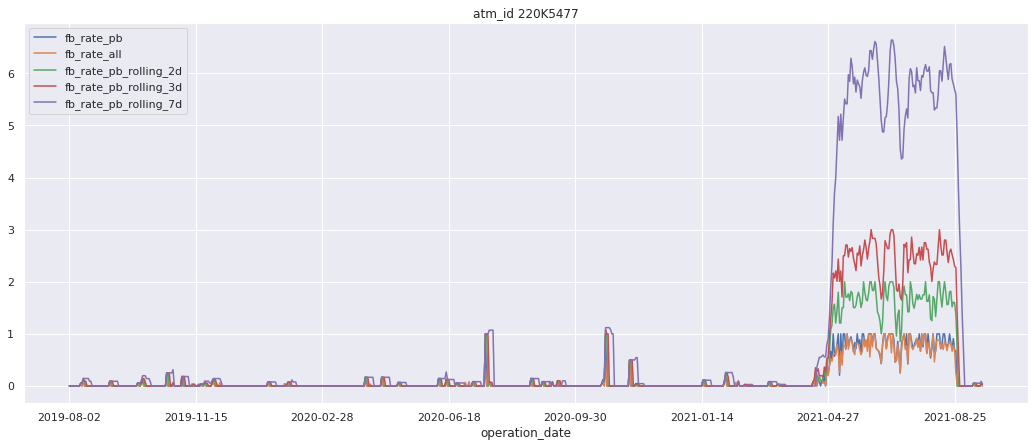

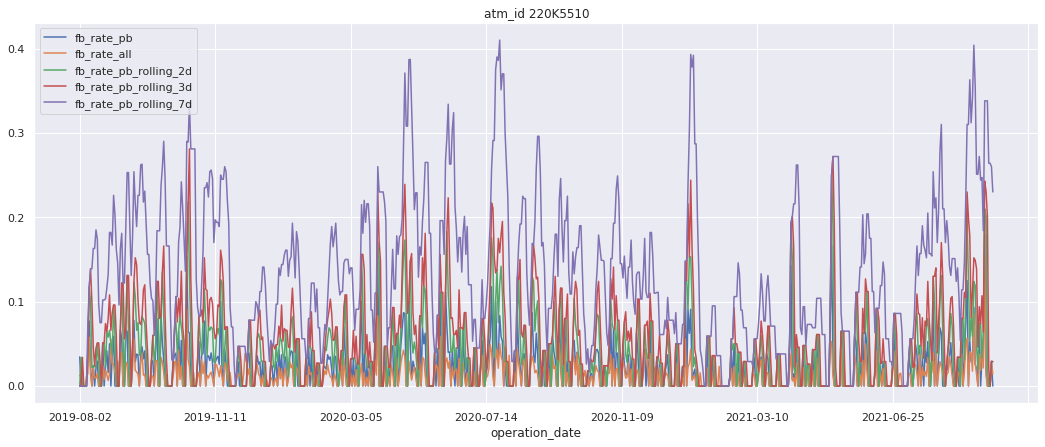

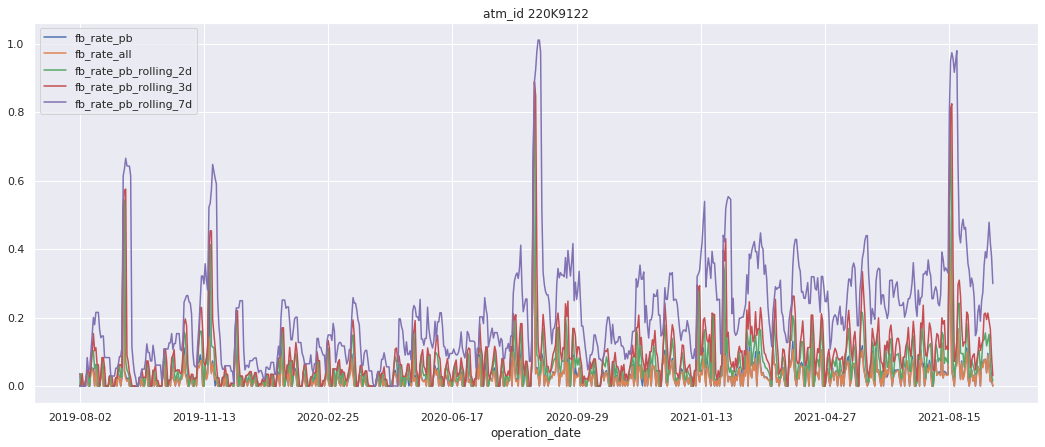

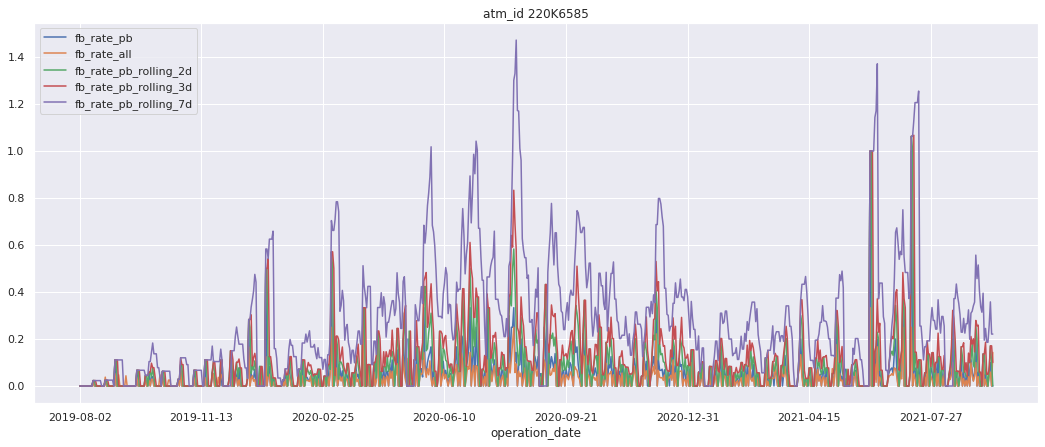

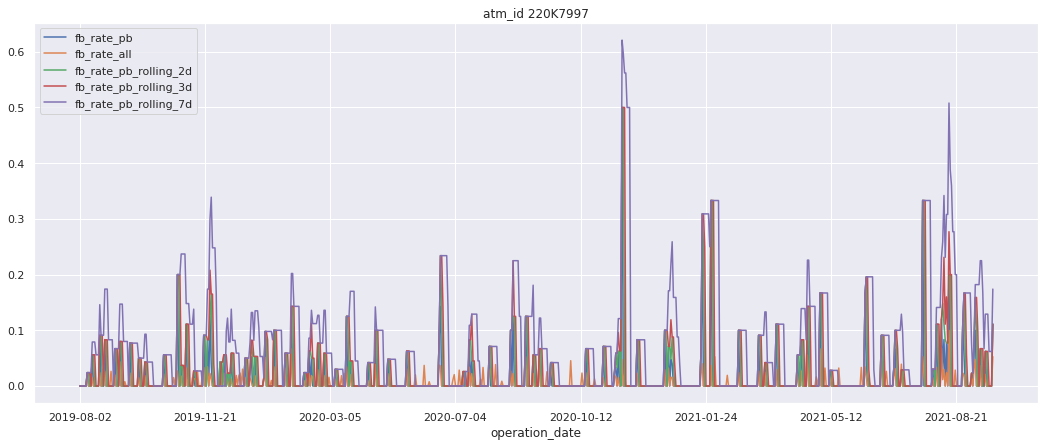

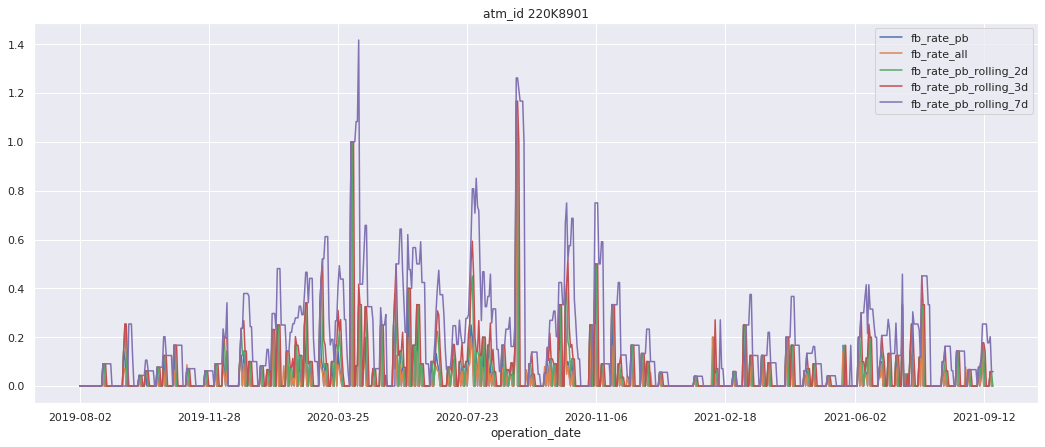

In [17]:
for atm in atm_list:
    fb_atm = fb_pb_plus_all[fb_pb_plus_all['atm_id'] == atm][['operation_date', 'fb_rate_pb', 'fb_rate_all']].set_index('operation_date')
    fb_atm['fb_rate_pb_rolling_2d'] = round(fb_atm['fb_rate_pb'].rolling(2).sum(), 3).fillna(0)
    fb_atm['fb_rate_pb_rolling_3d'] = round(fb_atm['fb_rate_pb'].rolling(3).sum(), 3).fillna(0)
    fb_atm['fb_rate_pb_rolling_7d'] = round(fb_atm['fb_rate_pb'].rolling(7).sum(), 3).fillna(0)
    #display(atm)
    #display(fb_atm)
    fb_atm.plot();
    plt.title('atm_id ' + atm)

Из 3D и 7D окон, на мой взгляд, 3D-окно больше подходит, так как на этом интервале уже виден рост фоллбэк операций и можно уже понять отправлять ли специалиста к банкомату.

8. Провести дополнительные визуализации и расчеты по своему усмотрению

In [18]:
fb_10per = fb_pb_plus_all #fb_pb_plus_all[fb_pb_plus_all['unique_fb_cards_pb'] > 10]
fb_10per['more10'] = fb_10per[fb_10per['unique_fb_cards_pb'].apply(lambda x: 0 if x < 10 else x ) > 1 ]['fb_rate_pb']
fb_10per['more10'] = fb_10per['more10'].fillna(0.000)

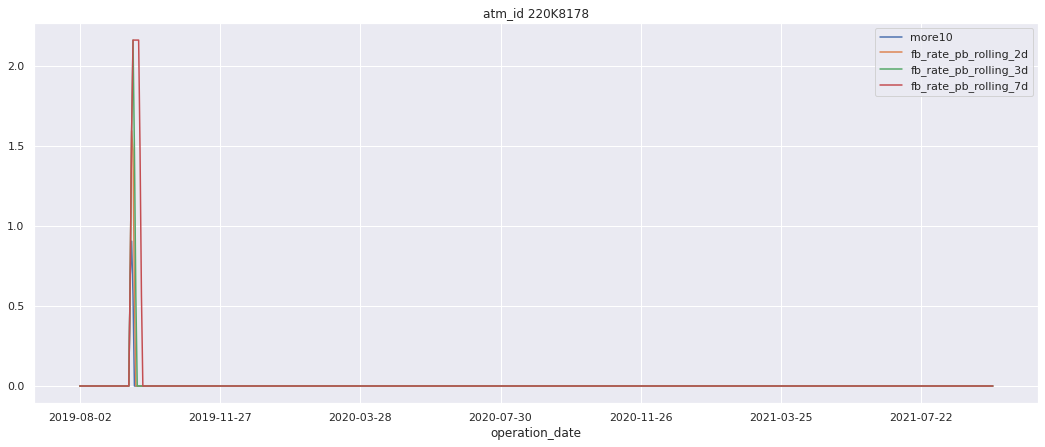

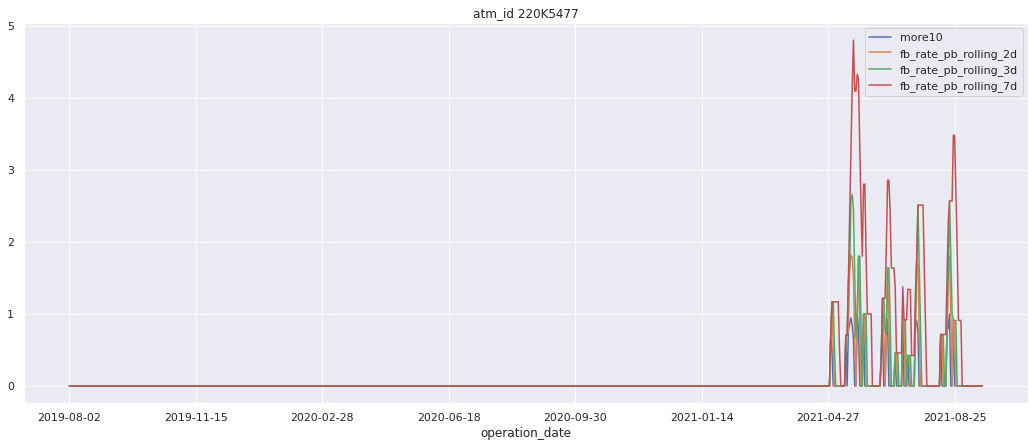

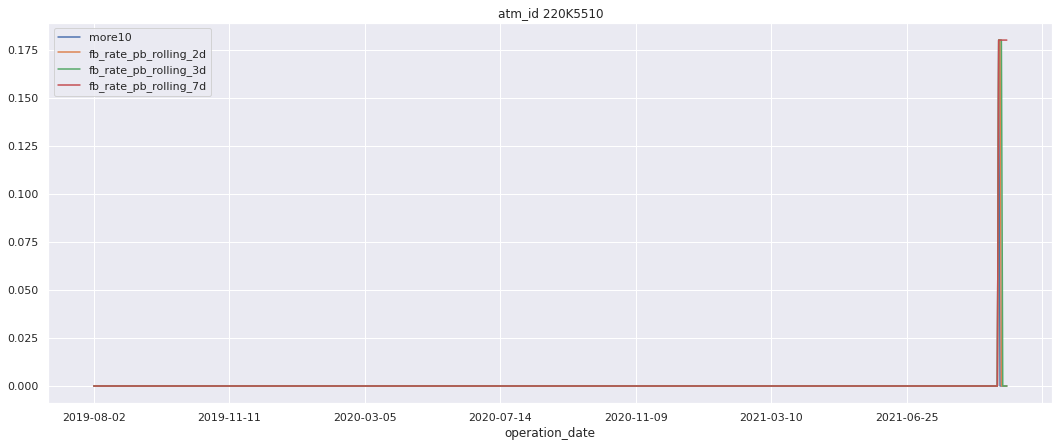

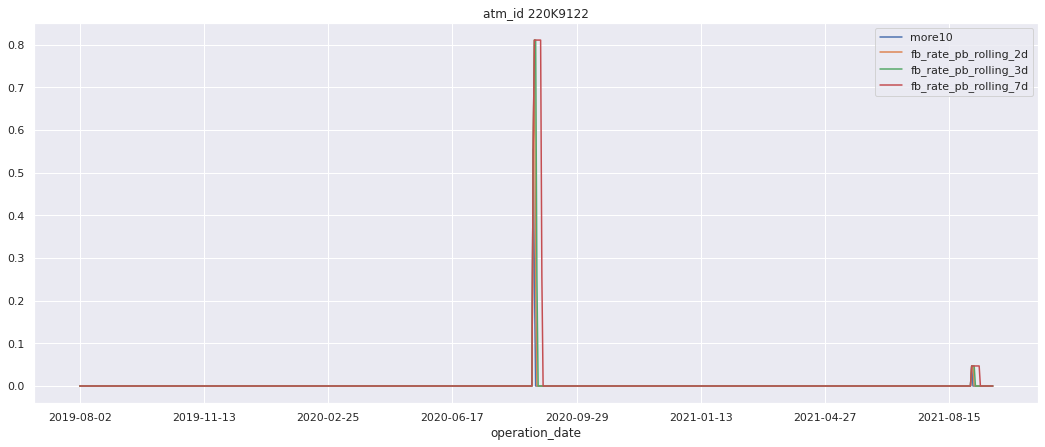

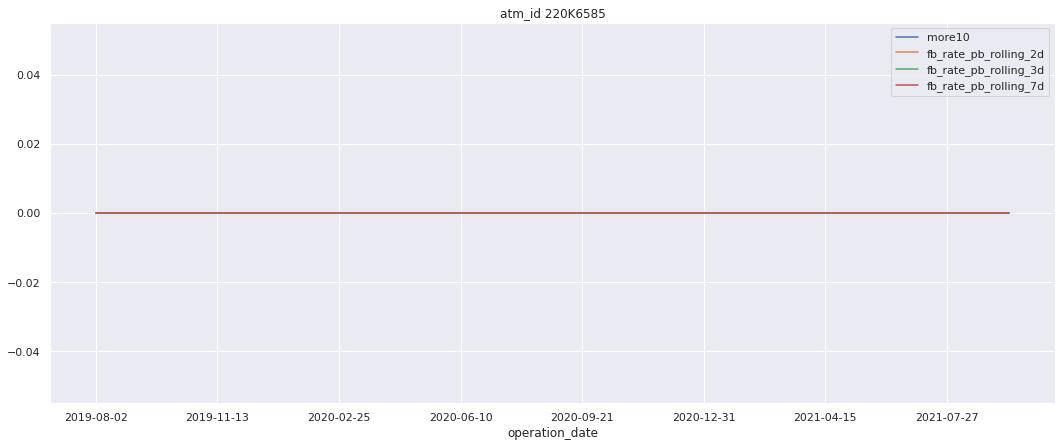

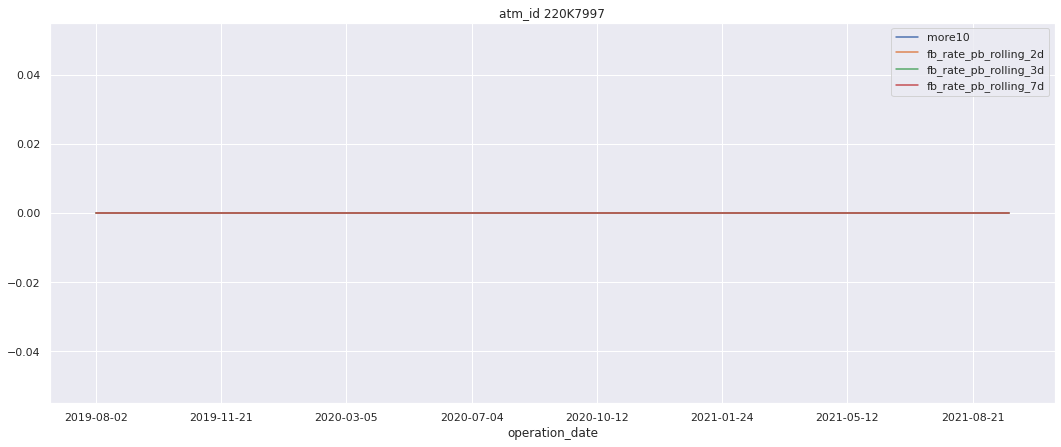

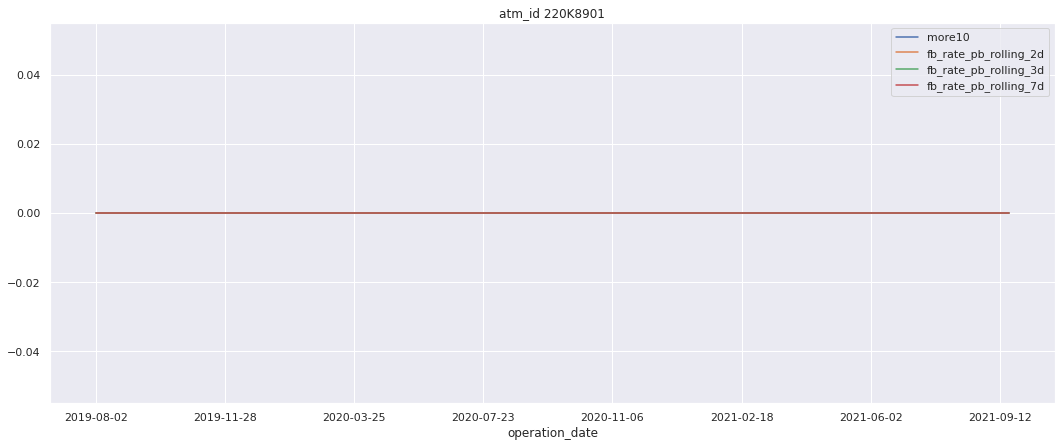

In [19]:
for atm in atm_list:
    fb_atm = fb_10per[fb_10per['atm_id'] == atm][['operation_date', 'more10']].set_index('operation_date')
    fb_atm['fb_rate_pb_rolling_2d'] = round(fb_atm['more10'].rolling(2).sum(), 3).fillna(0)
    fb_atm['fb_rate_pb_rolling_3d'] = round(fb_atm['more10'].rolling(3).sum(), 3).fillna(0)
    fb_atm['fb_rate_pb_rolling_7d'] = round(fb_atm['more10'].rolling(7).sum(), 3).fillna(0)
    #display(atm)
    #display(fb_atm)
    fb_atm.plot();
    plt.title('atm_id ' + atm)

### Общие мысли по fallback

Постепенного роста по операциям fallback на длительном этапе не наблюдается, также нет сезонности, поэтомы для анализа можно использовать меньшую глубину данных (например, квартал или полгода). 

Графики fb_rate_pb и fb_rate_all практически совпадают, хотя и есть некоторые различия, внизу вывел данные где доля fallback транзакций ПБ меньше половины, а количество fallback более 20. Но это возможно и из-за неработающего чипа на карте чужого банка(лучше уточнить у технологов), если это так, то может быть сформирована излишняя заявка на проверку оборудования. На мой взляд признак <b>fb_rate_pb</b> подходит, только дополнительно, на мой взгляд, можно использовать признак <b>unique_fb_cards_pb</b>(на этапе формирования заявки СП) для откидывания случаев когда прошло малое количество транзакций и они все фоллбэк. Глубина анализа данных 3 месяца. Если система сбора и хранения информации позволяет получать информацию более одного раза в сутки, то, возможно, стоит провести анализ с более мелким временным интервалом.

Из 3D и 7D окон, на мой взгляд, 3D-окно больше подходит, так как на этом интервале уже виден рост фоллбэк операций и можно уже понять отправлять ли специалиста к банкомату.